In [83]:
import tensorflow as tf
import keras
import keras_vggface
from keras_vggface.vggface import VGGFace
# Had to change code in keras vggface to make it work changed model.py line 20 as shown here https://stackoverflow.com/a/71379206
import numpy as np
import matplotlib as mpl
import keras_vggface.utils
import PIL
import os
import os.path
import matplotlib.pyplot as plt

In [84]:
train_seed = 30
split = 0.2

train_dataset = keras.utils.image_dataset_from_directory('./AIGroupFaces', shuffle=True, image_size=(224, 224), batch_size=64, seed=train_seed, validation_split=split, subset='training')
val_dataset = keras.utils.image_dataset_from_directory('./AIGroupFaces', shuffle=True, image_size=(224, 224), batch_size=64, seed=train_seed, validation_split=split, subset='validation')

Found 300 files belonging to 4 classes.
Using 240 files for training.
Found 300 files belonging to 4 classes.
Using 60 files for validation.


In [86]:
data_aug = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.2), ])

In [89]:
num_classes = 4

model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(num_classes,activation='softmax')
])

In [92]:
LR = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [93]:
history = model.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20


/Users/jacobmoran/miniforge3/envs/AI310/lib/python3.10/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-05-04 10:33:03.734319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - ETA: 0s - loss: 6.1468 - accuracy: 0.4042

2023-05-04 10:33:05.337555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 2s 494ms/step - loss: 6.1468 - accuracy: 0.4042 - val_loss: 4.4089 - val_accuracy: 0.4167
Epoch 2/20
4/4 [==============================] - 2s 457ms/step - loss: 3.0948 - accuracy: 0.4875 - val_loss: 1.1022 - val_accuracy: 0.8167
Epoch 3/20
4/4 [==============================] - 2s 457ms/step - loss: 0.7069 - accuracy: 0.8000 - val_loss: 1.1590 - val_accuracy: 0.4667
Epoch 4/20
4/4 [==============================] - 2s 454ms/step - loss: 0.7915 - accuracy: 0.7375 - val_loss: 0.6742 - val_accuracy: 0.8833
Epoch 5/20
4/4 [==============================] - 2s 457ms/step - loss: 0.6237 - accuracy: 0.8583 - val_loss: 0.6005 - val_accuracy: 0.8667
Epoch 6/20
4/4 [==============================] - 2s 456ms/step - loss: 0.5616 - accuracy: 0.8083 - val_loss: 0.5360 - val_accuracy: 0.8500
Epoch 7/20
4/4 [==============================] - 2s 456ms/step - loss: 0.4768 - accuracy: 0.8500 - val_loss: 0.4583 - val_accuracy: 0.8500
Epoch 8/20
4/4 [===============

In [94]:
pred=model.predict(val_dataset)
pred.argmax(axis=1)

1/1 [==============================] - 0s 62ms/step


2023-05-04 10:34:15.550350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([3, 3, 3, 2, 3, 2, 1, 2, 2, 2, 1, 3, 2, 1, 3, 2, 2, 3, 3, 2, 2, 1,
       2, 3, 2, 1, 2, 1, 2, 1, 3, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 3, 0, 2,
       3, 3, 2, 3, 2, 3, 3, 3, 0, 1, 3, 3, 0, 2, 3, 1])

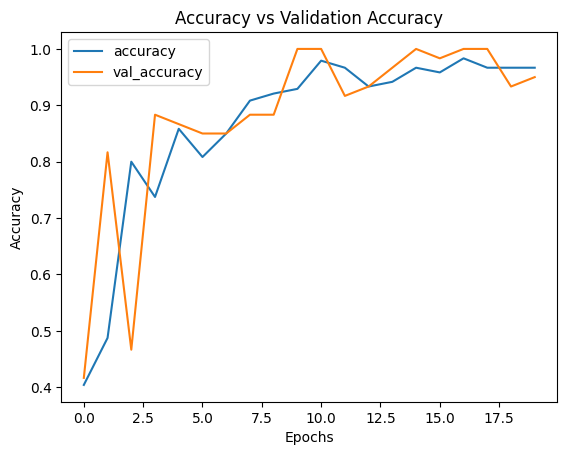

In [95]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.title("Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
class_labels = ['Alex', 'Jacob', 'Lewis', 'Unknown']

In [74]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    # Load and resize the image
    img = image.load_img(img_path, target_size=target_size)
    
    # Convert the image to a numpy array and normalize the pixel values
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    return img_array

# Replace 'path/to/your/image.jpg' with the actual path to the image you want to predict on
img_path = 'Faces/Jacob/0f2f_Jacob_4.jpg'

img_array = load_and_preprocess_image(img_path)

# Make a prediction
predictions = model.predict(img_array)

# Decode the predictions (if necessary, e.g., for classification tasks)
# decoded_predictions = decode_predictions(predictions, top=3)[0]

# Print the results
print(predictions)
# Convert the predicted probabilities to class indices
predicted_class_index = np.argmax(predictions)

# Map the predicted class index to the corresponding class label
predicted_class_label = class_labels[predicted_class_index]
print(predicted_class_label)


1/1 [==============================] - 0s 17ms/step
[[ 0.25580546 -1.9794745  -1.368159    7.3285775 ]]
Unknown


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

y_pred = []
y_true = []
for images, labels in val_dataset.unbatch().batch(1).as_numpy_iterator():
    y_true.append(labels[0])
    y_pred.append(np.argmax(model.predict(images), axis=-1)[0])

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Get the class names
class_names = train_dataset.class_names

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)

# Privacy

In [96]:
from tensorflow_privacy.privacy.optimizers.dp_optimizer import DPGradientDescentGaussianOptimizer
import tensorflow_privacy

In [97]:
num_classes = 4

model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(num_classes,activation='softmax')
])

In [98]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False, reduction=tf.losses.Reduction.NONE)

In [99]:
noise_multiplier = 1.1
l2_norm_clip = 5
num_microbatches = 16
learning_rate = 0.0001

optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate
)

In [100]:
LR = 0.0001

model.compile(optimizer=optimizer,
    loss = loss,
    metrics=['accuracy'])

In [101]:
history = model.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20


2023-05-04 10:37:04.682396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - ETA: 0s - loss: 1.4730 - accuracy: 0.0625

2023-05-04 10:37:20.461617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 17s 4s/step - loss: 1.4730 - accuracy: 0.0625 - val_loss: 1.4472 - val_accuracy: 0.1333
Epoch 2/20
4/4 [==============================] - 15s 4s/step - loss: 1.4410 - accuracy: 0.1000 - val_loss: 1.4198 - val_accuracy: 0.1833
Epoch 3/20
4/4 [==============================] - 16s 4s/step - loss: 1.4079 - accuracy: 0.1792 - val_loss: 1.3933 - val_accuracy: 0.2000
Epoch 4/20
4/4 [==============================] - 15s 4s/step - loss: 1.3751 - accuracy: 0.2083 - val_loss: 1.3648 - val_accuracy: 0.2667
Epoch 5/20
4/4 [==============================] - 15s 4s/step - loss: 1.3429 - accuracy: 0.3708 - val_loss: 1.3394 - val_accuracy: 0.3333
Epoch 6/20
4/4 [==============================] - 15s 4s/step - loss: 1.3128 - accuracy: 0.4125 - val_loss: 1.3157 - val_accuracy: 0.3667
Epoch 7/20
4/4 [==============================] - 15s 4s/step - loss: 1.2875 - accuracy: 0.4708 - val_loss: 1.2944 - val_accuracy: 0.4000
Epoch 8/20
4/4 [=============================

In [104]:
tensorflow_privacy.compute_dp_sgd_privacy(240, 64, 1.1, 20, 1e-5)

DP-SGD with sampling rate = 26.7% and noise_multiplier = 1.1 iterated over 75 steps satisfies differential privacy with eps = 14 and delta = 0.0001.
The optimal RDP order is 2.25.


(13.96829358497813, 2.25)